# Parcial 3: 
### Curso: Metodos computacionales 
### Profesor: Hernán David Salinas Jiménez


La entrega del examen se debe realizar a traves del git-hub en el directorio de cada estudiante.


# Ecuaciones diferenciales


## Body Planet Orbits
1. (33%) Newton’s explanation of the motion of the planets in terms of a universal law of gravitation is one of the great achievements of science. He was able to prove that the planets traveled along elliptical paths with the sun at one vertex and to predict periods of the motion accurately. All Newton needed to postulate was that the force between a planet of mass $m$ and the sun of mass $M$ is

\begin{equation}
F^{(g)} = -\frac{GmM}{r^2}
\end{equation}

Here $r$ is the planet-CM distance, $G$ is the universal gravitational constant, and the attractive force lies along the line connecting the planet and the sun. The hard part for Newton was solving the resulting differential equations because he had to invent calculus to do it and then had go through numerous analytic manipulations. The numerical solution is straightforward since even for planets the equation of motion is still

\begin{equation}
\vec{f}=m\vec{a} = m \frac{\mathrm{d}^2\vec{r}}{\mathrm{d}t^2}
\end{equation}

with the force having components:

\begin{equation}
f_x  = F^{(g)}\cos \theta =  F^{(g)}\frac{x}{r}
\end{equation}


\begin{equation}
f_y  = F^{(g)}\sin \theta =  F^{(g)}\frac{y}{r}
\end{equation}

where 

\begin{equation}
r=\sqrt{x^2+y^2}
\end{equation}



The equation of motion yields two simultaneous second-order ODEs:

\begin{equation}
\frac{\mathrm{d}^2x}{\mathrm{d}t^2}=-GM \frac{x}{r^3}
\end{equation}

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2}=-GM \frac{y}{r^3}
\end{equation}


a. Solve the diferential equation with the next parameter:

Assume units such that GM = 1 and use the initial conditions x(0) = 0.5, y(0) = 0, vx(0) = 0.0, vy(0) = 1.63.

b. Realice a graph kind subplot with 1 row and 2 columns: in the first subplot include the graph: x vs t, y vs t and the second graph y vs x,  what is the conclusion of this results?.



In [ ]:
#@title Solve the diferential equation with the next parameter: Assume units such that GM = 1 and use the initial conditions x(0) = 0.5, y(0) = 0, vx(0) = 0.0, vy(0) = 1.63

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

x0=0.5
y0=0
vx=0
vy=1.63
ci= [x0, y0, vx, vy]

ti= 0
tf = 10
N = 1000
t = np.linspace(ti, tf, N)

def ecuacion(u, t):
    x, y, vx, vy = u
    r = np.sqrt(x**2 + y**2)
    GM = 1  # Assuming GM = 1
    dxdt = vx
    dydt = vy
    dvxdt = -GM * x / r**3
    dvydt = -GM * y / r**3
    return np.array([dxdt, dydt, dvxdt, dvydt])

solucion = odeint(ecuacion, ci, t)



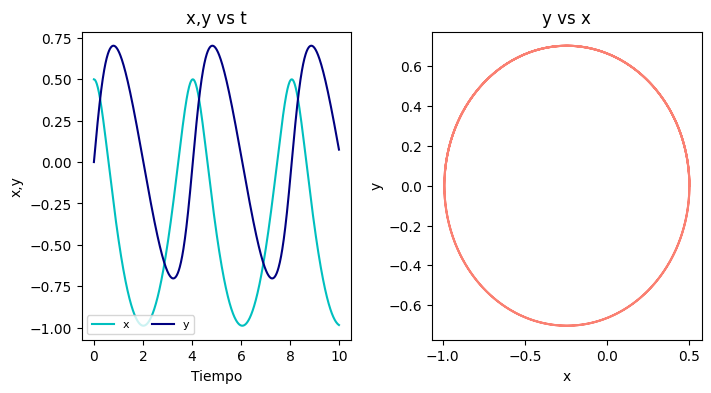

In [140]:
fig, axs=plt.subplots(1,2, figsize=(8,4))

axs[0].plot(t, solucion[:, 0],  label='x', color='c')
axs[0].plot(t, solucion[:, 1],  label='y', color='navy')
axs[0].set_title('x,y vs t')
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('x,y')
axs[0].legend(ncol=2, fontsize=8, loc='lower left')

axs[1].plot(solucion[:, 0], solucion[:, 1],  color='salmon')
axs[1].set_title('y vs x')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

plt.subplots_adjust(wspace=0.3)


# Según las gráficas vemos que los objetos siguen un movimiento oscilatorio en el tiempo pero este es circular en el espacio.


### Integracion 
2. (33%) Las [integrales elipticas](https://es.wikipedia.org/wiki/Integral_el%C3%ADptica#:~:text=Una%20integral%20el%C3%ADptica%20de%20primera,segundas%20dependen%20de%20dos%20variables) son integrales que permite dar solución a múltiples problemas en física y matemáticas. Algunos ejemplos de su uso, pueden ser encontrados en las siguientes referencias [[1]](http://www.sc.ehu.es/sbweb/fisica3/especial/eliptica/eliptica.html)
[[2]](http://www.sc.ehu.es/sbweb/fisica_/numerico/integral/eliptica_ejemplos.html). El siguiente problema esta relacionado con al integración eliptica.


La [longitud de arco](http://www.sc.ehu.es/sbweb/fisica3/especial/eliptica/eliptica.html) de  una elipse puede ser calculada a través de la siguiente integral.

\begin{equation}
L(k) = 4a\int_0^{\pi/2}  \mathrm{d} \phi \sqrt{1-k^2\sin^2 \phi}
\end{equation}

donde $ k^2 = \frac{a^2-b^2}{a^2} = \epsilon $, siendo $\epsilon$ la excentricidad de la elipse, a y b el semieje mayor y menor de la elipse respectivamente, $a>b$.

1. Para $b = 1$, y $a$ entre 1 y 100, construya un conjunto de valores de excentrecidades y realice la integración para cada excentrecidad.
Construya un grafico de $L$ vs $\epsilon$.

2. Determine la longitud de arco de la solucion del problema 1.



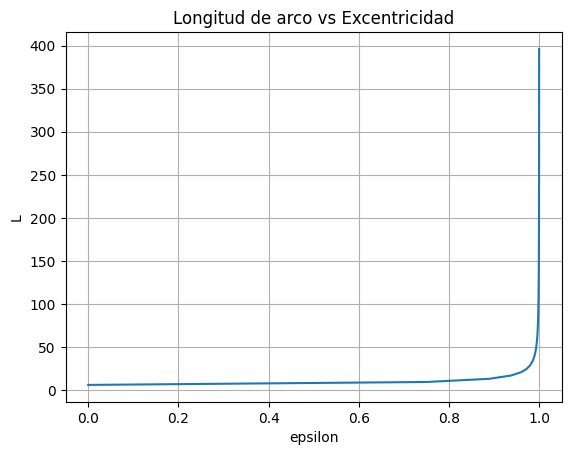

In [113]:
#@title 1. Para $b = 1$, y $a$ entre 1 y 100, construya un conjunto de valores de excentrecidades y realice la integración para cada excentrecidad. Construya un grafico de $L$ vs $\epsilon$.

from scipy import integrate

b = 1
a = np.arange(1, 100) 

def integral(phi, k, a):
    return 4*a*np.sqrt(1 - k* np.sin(phi)**2)


L_values = []
epsilon_values = []

for a in a:
    k=(a**2-b**2)/a**2
    epsilon = k
    L, error = integrate.quad(integral, 0, np.pi/2, args=(epsilon,a,))
    L_values.append(L)
    epsilon_values.append(epsilon)


plt.plot(epsilon_values, L_values)
plt.xlabel('epsilon')
plt.ylabel('L')
plt.grid()
plt.title('Longitud de arco vs Excentricidad')
plt.show()


In [ ]:
#@title a) Determine la longitud de arco de la solucion del problema 1.
b = 1
a = 5 #@param 

L, error = integrate.quad(integral, 0, np.pi/2, args=(epsilon,a))
longitud = L

print("Longitud de arco:", longitud)


Longitud de arco: 20.576728812832737



### Matrices: Rotación  en el plano, autovalores y autovectores
3 (33%).   Considere la siguiente matrix de rotación:
\begin{bmatrix} 
\cos \theta & -\sin \theta\\ 
\sin \theta & \cos \theta
\end{bmatrix}

a) Encontrar el polinomio característico de A

b) Encontrar los autovalores y autovectores

c) construya la matriz diagonal con los autovalores y autovectores y compruebe su solución. 

Encontrar los autovalores y autovectores para $\theta=45$.

In [103]:
#@title a) Encontrar el polinomio característico de A
#primero debemos contruir la matriz que serà llamada A
import numpy as np
import sympy as sp
import scipy as sc

x= sp.Symbol('x') #Simbolo angulo

v1=np.array([sp.cos(x),-1*sp.sin(x)])
v2=np.array([sp.sin(x), sp.cos(x)])
A=np.array([v1, v2])
type(A)

numpy.ndarray

In [104]:
I=np.identity(2) #creamos la identidad por lambda
m=sp.Symbol('m')
Im=I*m
Im


array([[1.0*m, 0],
       [0, 1.0*m]], dtype=object)

In [105]:
a=A-Im
det=a[0][0]*a[1][1] - a[0][1]*a[1][0]
cpoly = det.simplify()
cpoly

1.0*m**2 - 2.0*m*cos(x) + 1.0

In [110]:
#@title Encontrar los autovalores y autovectores para $\theta=45$.
theta=45
theta_rad = np.deg2rad(theta) 

v1=np.array([np.cos(theta_rad ),-1*np.sin(theta_rad )])
v2=np.array([np.sin(theta_rad ), np.cos(theta_rad )])
A=np.array([v1, v2])

eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvectors

array([[0.70710678+0.j        , 0.70710678-0.j        ],
       [0.        -0.70710678j, 0.        +0.70710678j]])

In [111]:
eigenvalues

array([0.70710678+0.70710678j, 0.70710678-0.70710678j])